# Detect and Remove the Outliers

In [ ]:
import matplotlib.pyplot as plt

In [ ]:
# Importing
import sklearn
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt



In [ ]:
import pandas as pd
import numpy as np

data_url = "http://lib.stat.cmu.edu/datasets/boston"
raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
target = raw_df.values[1::2, 2]
data.shape, target.shape
# Define the feature names
feature_names = [
    'CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX',
    'PTRATIO', 'B', 'LSTAT'
]

# Create a DataFrame with the data and feature names
df_boston = pd.DataFrame(data, columns=feature_names)

# Add the target (house prices) to the DataFrame
df_boston['MEDV'] = target

# Display the DataFrame
print(df_boston.head())


      CRIM    ZN  INDUS  CHAS    NOX     RM   AGE     DIS  RAD    TAX  \
0  0.00632  18.0   2.31   0.0  0.538  6.575  65.2  4.0900  1.0  296.0   
1  0.02731   0.0   7.07   0.0  0.469  6.421  78.9  4.9671  2.0  242.0   
2  0.02729   0.0   7.07   0.0  0.469  7.185  61.1  4.9671  2.0  242.0   
3  0.03237   0.0   2.18   0.0  0.458  6.998  45.8  6.0622  3.0  222.0   
4  0.06905   0.0   2.18   0.0  0.458  7.147  54.2  6.0622  3.0  222.0   

   PTRATIO       B  LSTAT  MEDV  
0     15.3  396.90   4.98  24.0  
1     17.8  396.90   9.14  21.6  
2     17.8  392.83   4.03  34.7  
3     18.7  394.63   2.94  33.4  
4     18.7  396.90   5.33  36.2  


# Method 1: Using Visualization techniques
Outliers can be detected using visualization techniques like boxplot and scatter plots

a. Using BoxPlot
It captures the summary of the data effectively and efficiently with only a simple box and whiskers. Boxplot summarizes sample data using 25th, 50th, and 75th percentiles. One can just get insights(quartiles, median, and outliers) into the dataset by just looking at its boxplot.

/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)


<Axes: ylabel='DIS'>

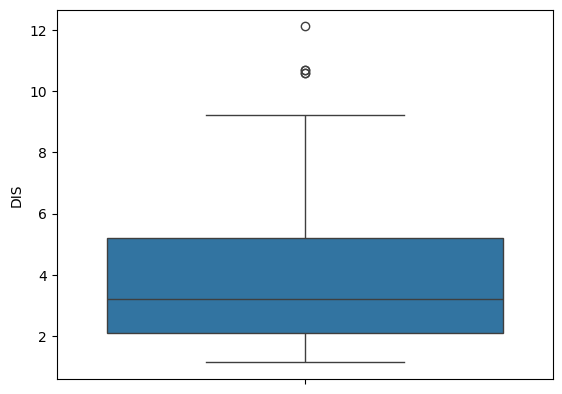

In [ ]:
import seaborn as sns
sns.boxplot(df_boston['DIS'])

In [ ]:
# Drop those rows where 'DIS' is greater than 10
df_boston_cleaned = df_boston[df_boston['DIS'] <= 10]

# Alternatively, you can use the .drop() method with the index of outliers
# df_boston_cleaned = df_boston.drop(outlier_positions[0])

# Check the cleaned DataFrame
print(df_boston_cleaned)

        CRIM    ZN  INDUS  CHAS    NOX     RM   AGE     DIS  RAD    TAX  \
0    0.00632  18.0   2.31   0.0  0.538  6.575  65.2  4.0900  1.0  296.0   
1    0.02731   0.0   7.07   0.0  0.469  6.421  78.9  4.9671  2.0  242.0   
2    0.02729   0.0   7.07   0.0  0.469  7.185  61.1  4.9671  2.0  242.0   
3    0.03237   0.0   2.18   0.0  0.458  6.998  45.8  6.0622  3.0  222.0   
4    0.06905   0.0   2.18   0.0  0.458  7.147  54.2  6.0622  3.0  222.0   
..       ...   ...    ...   ...    ...    ...   ...     ...  ...    ...   
501  0.06263   0.0  11.93   0.0  0.573  6.593  69.1  2.4786  1.0  273.0   
502  0.04527   0.0  11.93   0.0  0.573  6.120  76.7  2.2875  1.0  273.0   
503  0.06076   0.0  11.93   0.0  0.573  6.976  91.0  2.1675  1.0  273.0   
504  0.10959   0.0  11.93   0.0  0.573  6.794  89.3  2.3889  1.0  273.0   
505  0.04741   0.0  11.93   0.0  0.573  6.030  80.8  2.5050  1.0  273.0   

     PTRATIO       B  LSTAT  MEDV  
0       15.3  396.90   4.98  24.0  
1       17.8  396.90   9.14

In [ ]:
print(np.where(df_boston_cleaned['DIS']>10))

(array([], dtype=int64),)


In [ ]:
# Position of the Outlie
outlier_indices=np.where(df_boston['DIS']>10)
print(np.shape(outlier_indices))
print(outlier_indices)

df_boston_cleaned = df_boston.drop(outlier_indices[0])

# Reset the index to keep it consistent after dropping rows (optional)
df_boston_cleaned.reset_index(drop=True, inplace=True)

(1, 5)
(array([351, 352, 353, 354, 355]),)


/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future ve

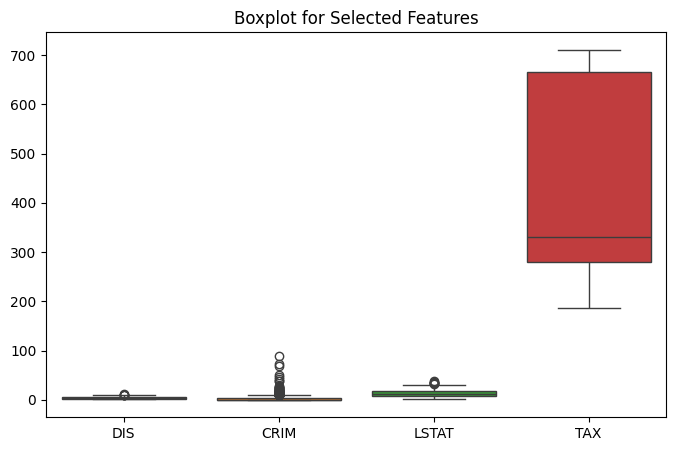

In [ ]:

plt.figure(figsize=(8, 5))
sns.boxplot(data=df_boston[['DIS', 'CRIM', 'LSTAT', 'TAX']])
plt.title('Boxplot for Selected Features')
plt.show()

b. ScatterPlot: It is used when you have paired numerical data, or when your dependent variable has multiple values for each reading independent variable, or when trying to determine the relationship between the two variables. In the process of utilizing the scatter plot, one can also use it for outlier detection.

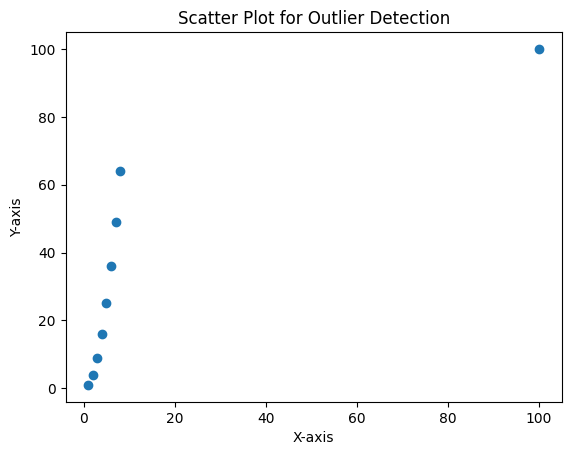

In [ ]:
import matplotlib.pyplot as plt

# Example Data (with an outlier)
x = [1, 2, 3, 4, 5, 6, 7, 8, 100]  # 100 is an outlier
y = [1, 4, 9, 16, 25, 36, 49, 64, 100]  # Follows y = x^2 except for the last point

# Create Scatter Plot
plt.scatter(x, y)

# Labeling the plot
plt.title("Scatter Plot for Outlier Detection")
plt.xlabel("X-axis")
plt.ylabel("Y-axis")

# Show the plot
plt.show()


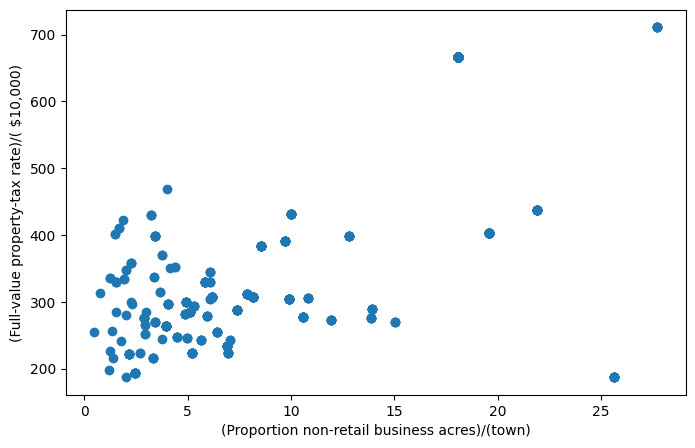

In [ ]:
#To plot the scatter plot one requires two variables that are somehow related to each other.
#So here, ‘Proportion of non-retail business acres per town’ and
#‘Full-value property-tax rate per $10,000’ are used
#whose column names are “INDUS” and “TAX” respectively.
# Scatter plot
fig, ax = plt.subplots(figsize = (8,5))
ax.scatter(df_boston['INDUS'], df_boston['TAX'])

# x-axis label
ax.set_xlabel('(Proportion non-retail business acres)/(town)')

# y-axis label
ax.set_ylabel('(Full-value property-tax rate)/( $10,000)')
plt.show()

Looking at the graph can summarize that most of the data points are in the bottom left corner of the graph but there are few points that are exactly;y opposite that is the top right corner of the graph. Those points in the top right corner can be regarded as Outliers.

Using approximation can say all those data points that are x>20 and y>600 are outliers.

In [ ]:
# Position of the Outlier
print(np.where((df_boston['INDUS']>20) & (df_boston['TAX']>600)))

(array([488, 489, 490, 491, 492]),)


In [ ]:
df_boston_cleaned = df_boston[~((df_boston['INDUS'] > 20) & (df_boston['TAX'] > 600))]
# Reset the index to keep it consistent after dropping rows (optional)

#df_boston_cleaned = df_boston.loc[(df_boston['INDUS'] <= 20) | (df_boston['TAX'] <= 600)]

df_boston_cleaned.reset_index(drop=True, inplace=True)

# Check the cleaned DataFrame
print(df_boston_cleaned)

        CRIM    ZN  INDUS  CHAS    NOX     RM   AGE     DIS  RAD    TAX  \
0    0.00632  18.0   2.31   0.0  0.538  6.575  65.2  4.0900  1.0  296.0   
1    0.02731   0.0   7.07   0.0  0.469  6.421  78.9  4.9671  2.0  242.0   
2    0.02729   0.0   7.07   0.0  0.469  7.185  61.1  4.9671  2.0  242.0   
3    0.03237   0.0   2.18   0.0  0.458  6.998  45.8  6.0622  3.0  222.0   
4    0.06905   0.0   2.18   0.0  0.458  7.147  54.2  6.0622  3.0  222.0   
..       ...   ...    ...   ...    ...    ...   ...     ...  ...    ...   
496  0.06263   0.0  11.93   0.0  0.573  6.593  69.1  2.4786  1.0  273.0   
497  0.04527   0.0  11.93   0.0  0.573  6.120  76.7  2.2875  1.0  273.0   
498  0.06076   0.0  11.93   0.0  0.573  6.976  91.0  2.1675  1.0  273.0   
499  0.10959   0.0  11.93   0.0  0.573  6.794  89.3  2.3889  1.0  273.0   
500  0.04741   0.0  11.93   0.0  0.573  6.030  80.8  2.5050  1.0  273.0   

     PTRATIO       B  LSTAT  MEDV  
0       15.3  396.90   4.98  24.0  
1       17.8  396.90   9.14

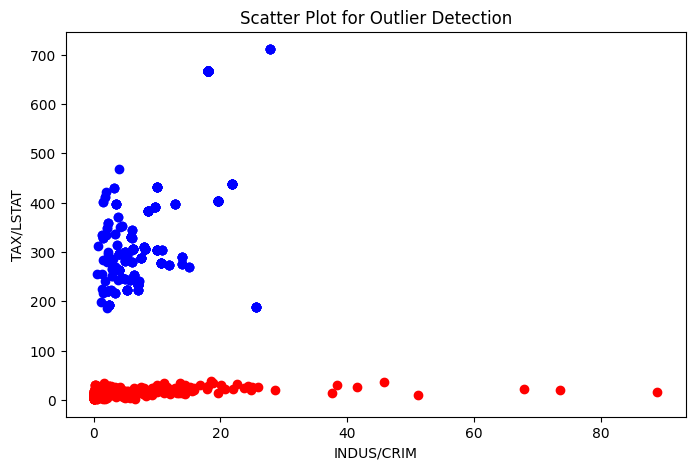

In [ ]:
plt.figure(figsize=(8, 5))
plt.scatter(df_boston['INDUS'], df_boston['TAX'], color='b')
plt.scatter(df_boston['CRIM'], df_boston['LSTAT'], color='r')
plt.xlabel('INDUS/CRIM')
plt.ylabel('TAX/LSTAT')
plt.title('Scatter Plot for Outlier Detection')
plt.show()

Skewness ≈ 0:The data is approximately symmetrical.

Skewness > 0 (Right Skew)

Skewness < 0 (Left Skew)

Skewness: 1.172364695483581


/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)


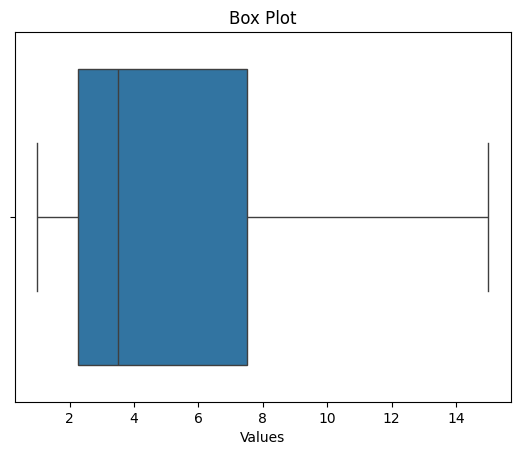

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Sample data
data = [1, 2, 2, 2, 3, 3,3, 4, 5, 6, 8, 10, 12, 15 ]

# Create a DataFrame
df = pd.DataFrame(data, columns=['Values'])

# Calculate skewness
skewness = df['Values'].skew()
print(f"Skewness: {skewness}")
sns.boxplot(x=df['Values'])
plt.title('Box Plot')

plt.show()


# Method 2: Using Z-score
Z- Score is also called a standard score. This value/score helps to understand that how far is the data point from the mean. And after setting up a threshold value one can utilize z score values of data points to define the outliers.

Normal Distribution: In a standard normal distribution (mean of 0 and standard deviation of 1),

about 68% of the data falls within one standard deviation (z-scores between -1 and 1),

about 95% falls within two standard deviations (z-scores between -2 and 2),


and approximately 99.7% falls within three standard deviations (z-scores between -3 and 3).

Using z-scores for outlier detection is effective, particularly for normally distributed data.

In [ ]:
# Z score
from scipy import stats
import numpy as np

z = np.abs(stats.zscore(df_boston['DIS']))
print(z)

0      0.140214
1      0.557160
2      0.557160
3      1.077737
4      1.077737
         ...   
501    0.625796
502    0.716639
503    0.773684
504    0.668437
505    0.613246
Name: DIS, Length: 506, dtype: float64


Now to define an outlier threshold value is chosen which is generally 3.0. As 99.7% of the data points lie between +/- 3 standard deviation (using Gaussian Distribution approach).

In [ ]:
threshold = 3

# Position of the outlier
print(np.where(z > 3))

(array([351, 352, 353, 354, 355]),)


In [ ]:
# Calculate Z-scores for all features
z_scores = np.abs(stats.zscore(df_boston[['DIS', 'CRIM', 'LSTAT', 'TAX']]))
print("Z-scores for DIS, CRIM, LSTAT, and TAX:\n", z_scores)

# Threshold for Z-scores
threshold = 3
outliers_z = np.where(z_scores > threshold)
print("Outliers detected by Z-scores:", outliers_z)

Z-scores for DIS, CRIM, LSTAT, and TAX:
           DIS      CRIM     LSTAT       TAX
0    0.140214  0.419782  1.075562  0.666608
1    0.557160  0.417339  0.492439  0.987329
2    0.557160  0.417342  1.208727  0.987329
3    1.077737  0.416750  1.361517  1.106115
4    1.077737  0.412482  1.026501  1.106115
..        ...       ...       ...       ...
501  0.625796  0.413229  0.418147  0.803212
502  0.716639  0.415249  0.500850  0.803212
503  0.773684  0.413447  0.983048  0.803212
504  0.668437  0.407764  0.865302  0.803212
505  0.613246  0.415000  0.669058  0.803212

[506 rows x 4 columns]
Outliers detected by Z-scores: (array([141, 351, 352, 353, 354, 355, 373, 374, 380, 398, 404, 405, 410,
       412, 414, 414, 418, 427]), array([2, 0, 0, 0, 0, 0, 2, 2, 1, 1, 1, 1, 1, 2, 1, 2, 1, 1]))


second array - represents the column indices of the features for which the outlier condition was met

# Method 3: Inter Quartile Range
Inter Quartile Range approach to finding the outliers is the most commonly used and most trusted approach used in the research field.

In [ ]:
# IQR
Q1 = np.percentile(df_boston['DIS'], 25,
                   interpolation = 'midpoint')

Q3 = np.percentile(df_boston['DIS'], 75,
                   interpolation = 'midpoint')
IQR = Q3 - Q1

In [ ]:
# Method 3: Interquartile Range (IQR)
# ------------------------------
# Calculate IQR for 'DIS' column as an example
Q1 = df_boston['DIS'].quantile(0.25)
Q3 = df_boston['DIS'].quantile(0.75)
IQR = Q3 - Q1

To define the outlier base value is defined above and below datasets normal range namely Upper and Lower bounds, define the upper and the lower bound (1.5*IQR value is considered) :

upper = Q3 +1.5*IQR

lower = Q1 – 1.5*IQR

In [ ]:
# Upper bound
upper = np.where(df_boston['DIS'] >= (Q3+1.5*IQR))
print(upper)
# Lower bound
lower = np.where(df_boston['DIS'] <= (Q1-1.5*IQR))
print(lower)

(array([351, 352, 353, 354, 355]),)
(array([], dtype=int64),)


In [ ]:
#Removing the Outliers
df_boston.drop(upper[0], inplace = True)
df_boston.drop(lower[0], inplace = True)

print("New Shape: ", df_boston.shape)

New Shape:  (501, 14)


In [ ]:
# Define bounds
upper_bound = Q3 + 1.5 * IQR
lower_bound = Q1 - 1.5 * IQR

# Find and remove outliers based on IQR
outliers_iqr = df_boston[(df_boston['DIS'] > upper_bound) | (df_boston['DIS'] < lower_bound)]
print(f"Number of outliers (IQR) for 'DIS': {len(outliers_iqr)}")

# Optionally remove outliers
df_boston_clean = df_boston[~((df_boston['DIS'] > upper_bound) | (df_boston['DIS'] < lower_bound))]
print("New Shape after IQR Outlier Removal:", df_boston_clean.shape)


Number of outliers (IQR) for 'DIS': 0
New Shape after IQR Outlier Removal: (501, 14)


# Method 4: Isolation Forests
The IsolationForest ‘isolates’ observations by randomly selecting a feature and then randomly selecting a split value between the maximum and minimum values of the selected feature.

Since recursive partitioning can be represented by a tree structure, the number of splittings required to isolate a sample is equivalent to the path length from the root node to the terminating node.

This path length, averaged over a forest of such random trees, is a measure of normality and our decision function.

Random partitioning produces noticeably shorter paths for anomalies. Hence, when a forest of random trees collectively produce shorter path lengths for particular samples, they are highly likely to be anomalies.

In [ ]:
from sklearn.ensemble import IsolationForest
X = [[-1.1], [0.3], [0.5], [100]]
clf = IsolationForest(random_state=0).fit(X)
clf.predict([[0.1], [0], [90]])


array([ 1,  1, -1])